In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing as p
import json

# import seaborn as sns
# from pandas.plotting import scatter_matrix

%matplotlib inline
# Make the images larger
plt.rcParams['figure.figsize'] = (16, 9)

In [25]:
batting_df=pd.read_csv('./Data_Output/batting.csv')
pitching_df=pd.read_csv('./Data_Output/pitching.csv')

print (batting_df.shape, pitching_df.shape)

(549, 21) (519, 22)


In [26]:
#drop players who have no stats for OBP, SLG, AVG = '.---'
batting_df=batting_df[batting_df['OBP']!='.---']
batting_df=batting_df[batting_df['SLG']!='.---']
batting_df=batting_df[batting_df['AVG']!='.---']

batting_df.shape

(470, 21)

In [27]:
#drop players who have no stats for ERA, WHIP = '*.**'
pitching_df=pitching_df[pitching_df['ERA']!='*.**']
pitching_df=pitching_df[pitching_df['WHIP']!='*.**']

pitching_df.shape

(518, 22)

In [28]:
#reset index
batting_df.reset_index(drop=True, inplace=True)
pitching_df.reset_index(drop=True, inplace=True)

#cast all numbers as floats (remove any strings)
for c in batting_df.columns:
    try:
        batting_df[c]=batting_data[c].astype('float')
    except:
        pass
    
for c in pitching_df.columns:
    try:
        pitching_df[c]=pitching_data[c].astype('float')
    except:
        pass

In [30]:
#dropping non-numerical and non-important columns
batting_data=batting_df.drop(['Name', 'id', 'POS', 'Team'], axis=1)
pitching_data=pitching_df.drop(['Name', 'id', 'Team'], axis=1)

In [31]:
#standardizing values
batting_columns=batting_data.columns
pitching_columns=pitching_data.columns

batting_ss = p.StandardScaler().fit_transform(batting_data)
batting_ss=pd.DataFrame(batting_ss, columns=batting_columns)

pitching_ss=p.StandardScaler().fit_transform(pitching_data)
pitching_ss=pd.DataFrame(pitching_ss, columns=pitching_columns)

In [32]:
pitching_ss.shape

(518, 19)

In [33]:
#Perform elbow method to find optimal value for K

#Define Kmeans fit
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE (average distance to centroid) for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

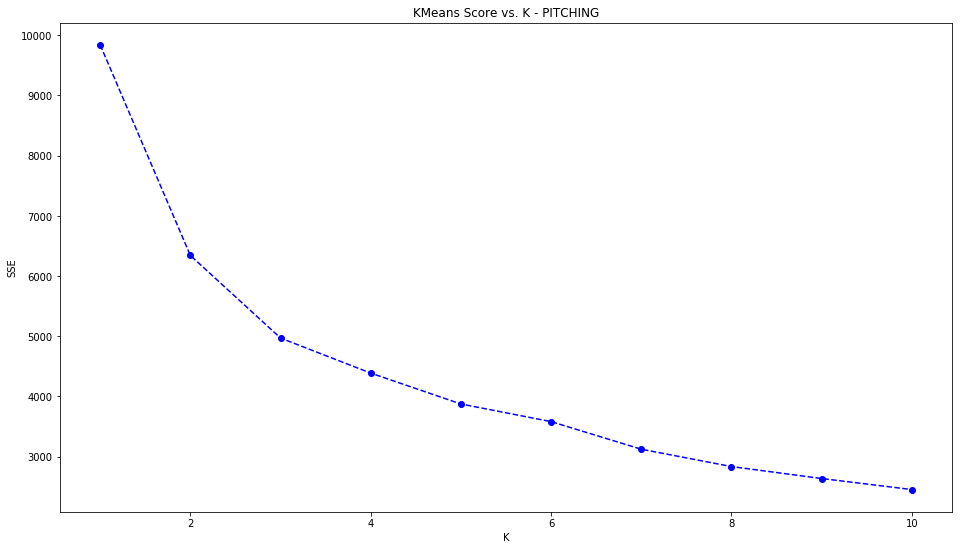

In [49]:
####### PITCHING ########
# test k values between 1 and 10
scores_pitching = []
centers_pitching = list(range(1,11))

#pitching
for center in centers_pitching:
    scores_pitching.append(get_kmeans_score(pitching_ss, center))
    
plt.plot(centers_pitching, scores_pitching, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('KMeans Score vs. K - PITCHING');
plt.savefig('./Images/ElbowPlotPitching.png')

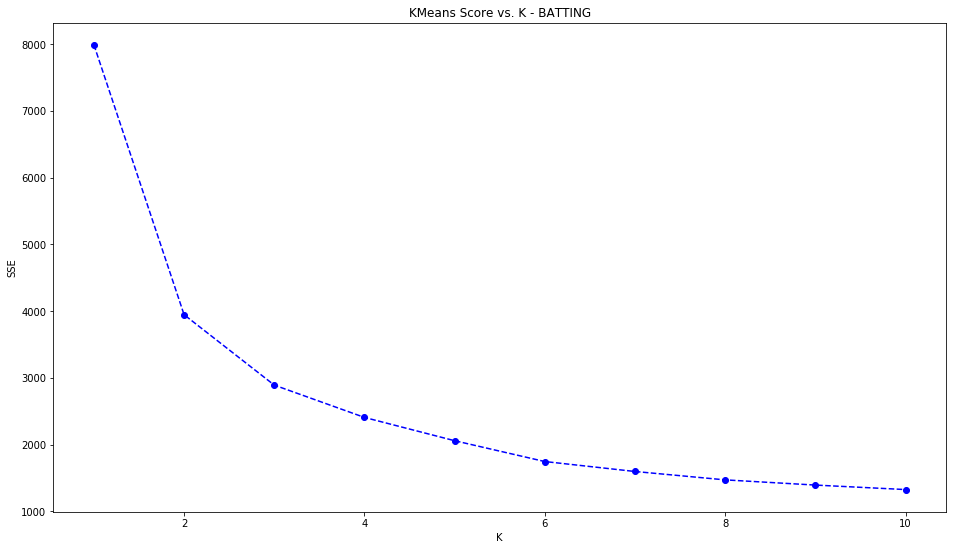

In [50]:
####### BATTING ########
# test k values between 1 and 10
scores_batting = []
centers_batting = list(range(1,11))

#pitching
for center in centers_batting:
    scores_batting.append(get_kmeans_score(batting_ss, center))
    
plt.plot(centers_batting, scores_batting, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('KMeans Score vs. K - BATTING');
plt.savefig('./Images/ElbowPlotBatting.png')

In [37]:
#Pitching Fitting of Kmeans with 4 clusters
kmeans_pitching = KMeans(n_clusters=4)
model_pitching = kmeans_pitching.fit(pitching_ss)
labels_pitching = model_pitching.predict(pitching_ss)

In [38]:
#Batting Fitting of Kmeans with 4 clusters
kmeans_batting = KMeans(n_clusters=4)
model_batting = kmeans_batting.fit(batting_ss)
labels_batting = model_batting.predict(batting_ss)

In [39]:
#append cluster label to orginal dataframe
batting_df['Cluster_label']=labels_batting
pitching_df['Cluster_label']=labels_pitching

In [40]:
batting_df.head()

,Name,id,POS,G,AB,R,H,2B,3B,HR,...,BB,SO,SB,CS,OBP,SLG,AVG,OPS,Team,Cluster_label
0,Rowdy Tellez,642133,1B,25.0,89.0,19.0,33.0,8.0,0.0,7.0,...,14.0,24.0,0.0,0.0,0.457,0.697,0.371,1.154,Buffalo Bisons,2
1,Vladimir Guerrero Jr.,665489,3B,9.0,30.0,7.0,11.0,1.0,0.0,3.0,...,4.0,2.0,1.0,0.0,0.441,0.700,0.367,1.141,Buffalo Bisons,2
2,Cavan Biggio,624415,2B,43.0,138.0,23.0,43.0,8.0,1.0,6.0,...,34.0,28.0,5.0,1.0,0.448,0.514,0.312,0.963,Buffalo Bisons,3
3,Socrates Brito,593647,RF,76.0,309.0,51.0,90.0,24.0,4.0,12.0,...,19.0,76.0,8.0,6.0,0.328,0.511,0.291,0.840,Buffalo Bisons,1
4,Ben Revere,519184,LF,8.0,35.0,4.0,10.0,3.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.286,0.371,0.286,0.657,Buffalo Bisons,2


In [48]:
pitching_df.head()

,Name,id,W,L,ERA,G,GS,CG,SHO,SV,...,ER,HR,HB,BB,SO,WHIP,HLD,GF,Team,Cluster_label
0,Jimmy Cordero,622772,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.00,0.0,0.0,Buffalo Bisons,3
1,Jackson McClelland,621143,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,7.0,1.00,1.0,0.0,Buffalo Bisons,3
2,David Phelps,475479,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.86,1.0,0.0,Buffalo Bisons,3
3,Neil Ramirez,519166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.00,0.0,0.0,Buffalo Bisons,3
4,Clayton Richard,453385,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,0.60,0.0,0.0,Buffalo Bisons,3


In [42]:
batting_dict=batting_df.to_dict('list')
pitching_dict=pitching_df.to_dict('list')

In [43]:
with open ('./Web_App/static/batting.json', 'w') as outfile:
    json.dump(batting_dict, outfile)
    
with open ('./Web_App/static/pitching.json', 'w') as outfile:
    json.dump(pitching_dict, outfile)  